In [28]:
import numpy as np 
import pandas as pd
import csv 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import os 
os.chdir("/Users/susanchen/Documents/GitHub/skincare_classification/Plots")

In [26]:
data = pd.read_csv('/Users/susanchen/Documents/GitHub/skincare_classification/Data_sets/Master_cleaned.csv')

## Quick Visualization of Prices

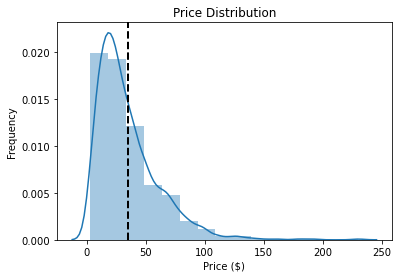

In [30]:
plot1 = sns.distplot(data["Price"], bins = 15)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.axvline(data['Price'].mean(), color = 'black', linestyle='dashed', linewidth=2)
plt.savefig('Price_distribution.png')